# 4장 Matplotlib을 활용한 시작화

## <u>히스토그램, 구간화, 밀도</u>

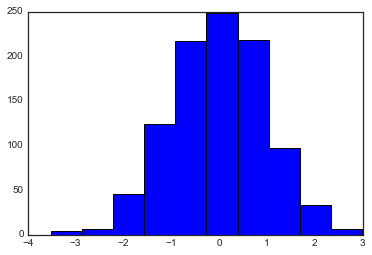

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

plt.hist(data);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.01385103, 0.        , 0.00461701, 0.        , 0.00461701,
        0.02308505, 0.05540413, 0.07848918, 0.07848918, 0.13851032,
        0.22161651, 0.21238249, 0.3462758 , 0.30933971, 0.3462758 ,
        0.42938199, 0.32780776, 0.38782889, 0.433999  , 0.3462758 ,
        0.22623352, 0.20776548, 0.13851032, 0.10157423, 0.0877232 ,
        0.0415531 , 0.02308505, 0.01385103, 0.00461701, 0.01385103]),
 array([-3.51461908, -3.29802872, -3.08143836, -2.864848  , -2.64825764,
        -2.43166728, -2.21507692, -1.99848655, -1.78189619, -1.56530583,
        -1.34871547, -1.13212511, -0.91553475, -0.69894439, -0.48235403,
        -0.26576367, -0.04917331,  0.16741705,  0.38400742,  0.60059778,
         0.81718814,  1.0337785 ,  1.25036886,  1.46695922,  1.68354958,
         1.90013994,  2.1167303 ,  2.33332066,  2.54991102,  2.76650139,
         2.98309175]),
 <a list of 1 Patch objects>)

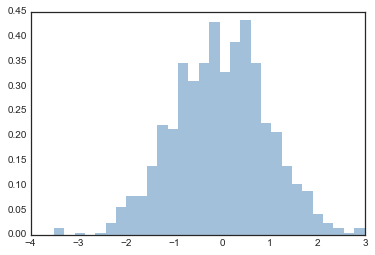

In [13]:
plt.hist(data, bins=30, normed=True, alpha=0.5, 
        histtype='stepfilled', color ='steelblue',
        edgecolor='none')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00298727, 0.00298727, 0.        , 0.        , 0.        ,
        0.        , 0.00896182, 0.01194909, 0.00896182, 0.02389817,
        0.03883453, 0.02987272, 0.03285999, 0.06571998, 0.05675817,
        0.11949087, 0.08961816, 0.15533814, 0.16131268, 0.17326177,
        0.13442723, 0.19417267, 0.20313449, 0.20910903, 0.22105812,
        0.1702745 , 0.20014721, 0.14040178, 0.10455451, 0.11052906,
        0.0746818 , 0.06273271, 0.05675817, 0.03883453, 0.01493636,
        0.01792363, 0.01792363, 0.01493636, 0.00896182, 0.00896182]),
 array([-4.5942363 , -4.2594827 , -3.9247291 , -3.5899755 , -3.2552219 ,
        -2.92046831, -2.58571471, -2.25096111, -1.91620751, -1.58145391,
        -1.24670031, -0.91194671, -0.57719312, -0.24243952,  0.09231408,
         0.42706768,  0.76182128,  1.09657488,  1.43132847,  1.76608207,
         2.10083567,  2.43558927,  2.77034287,  3.10509647,  3.43985006,
         3.77460366,  4.10935726,  4.44411086,  4.77886446,  5.11361806,
         5.44837

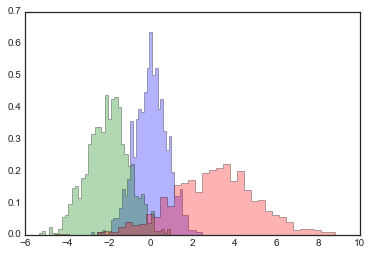

In [14]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [15]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 10 170 465 315  40]


### 2차원 히스토그램과 구간

In [16]:
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#### plt.hist2d: 2차원 히스토그램

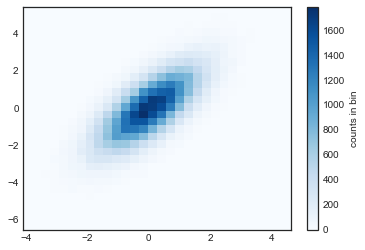

In [17]:
plt.hist2d(x,y,bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [18]:
counts, xedges, yedges = np.histogram2d(x,y, bins=30)

#### plt.hexbin:육각형 구간화

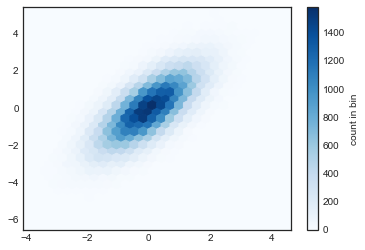

In [19]:
plt.hexbin(x, y, gridsize = 30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

#### 커널 밀도 추정

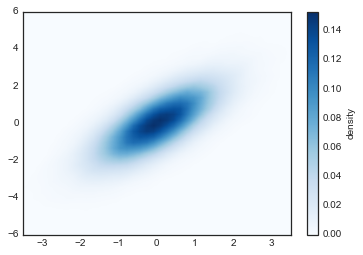

In [20]:
from scipy.stats import gaussian_kde
# 배열 크기 맞추기 [Ndim, Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

# 정규 그리드 평가
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 결과를 이미지로 그리기
plt.imshow(Z.reshape(Xgrid.shape), 
           origin='lower', aspect='auto', 
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")